In [ ]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [14]:
%%R

library(tidyverse)


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [12]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
%%R 

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv') #This need to be run in the same code chunk where the %%R is in the beginning(magic functions, because we are kind of translating between R and Python)
barris

# A tibble: 7,446 x 8
     Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
   <dbl>          <dbl> <chr>              <dbl> <chr>     <chr> <chr>       
 1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
 2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
 3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
 4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
 5  2018              2 Eixample               5 el Fort … Home  Espanya     
 6  2018              2 Eixample               6 la Sagra… Home  Espanya     
 7  2018              2 Eixample               7 la Dreta… Home  Espanya     
 8  2018              2 Eixample               8 l'Antiga… Home  Espanya     
 9  2018              2 Eixample               9 la Nova … Home  Espanya     
10  2018              2 Eixample              10 Sant Ant… Home  Espanya     
# … with 7,436 more rows, and 1 more varia

In [21]:
%%R 
head(barris)

# A tibble: 6 x 8
    Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
  <dbl>          <dbl> <chr>              <dbl> <chr>     <chr> <chr>       
1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
5  2018              2 Eixample               5 el Fort … Home  Espanya     
6  2018              2 Eixample               6 la Sagra… Home  Espanya     
# … with 1 more variable: Nombre <dbl>


In [11]:
#barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')

NameError: name 'barris' is not defined

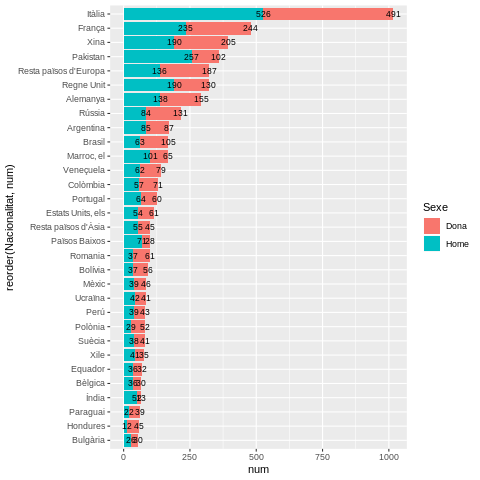

In [118]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

non_esp <- barris %>%
        filter(Nom_Barri == "el Poblenou", Nacionalitat !="Espanya") %>%
        group_by(Nacionalitat) %>%
        mutate(count2= sum(Nombre))%>%
        ungroup()%>%
        group_by(Nacionalitat, Sexe) %>%
        mutate(num=sum(Nombre)) %>%
        filter(count2 >50)
        

ggplot(non_esp,aes(x=reorder(Nacionalitat, num), y=num, fill=Sexe)) +
     geom_col() +
    coord_flip() +
    geom_text(aes(label = num), size=3, position = "stack") 



# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# Problem 3: Classes in Python

In [109]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!
import random

class RandomClassifier():
    def __init__(self, probability):
        self.probability=probability
        self.x = None #attribute x is yet undefined
        
    def predict(self, x):
        self.x = x
        #return int(random.random() <= self.probability)
        return np.random.binomial(n=1,p=0.2)


In [110]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

### What is lazy evaluation and when might you use it? (2-3 lines)